In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np

import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
import holidays

In [2]:
data = pd.read_csv("Data/train.csv")
data.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [3]:
dates = pd.to_datetime(data["Dates"], format = "%Y-%m-%d %H:%M:%S")
temp_data = data.set_index(dates)
# temp_data["Dates"] = dates
temp_data.head()

Dates        Category  \
Dates                                                      
2015-05-13 23:53:00  2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00  2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00  2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y  
Dates                           
2015-05-13 23:53:00  37.774599  
2015-05-13 23:53:00  37.774599  
2015-05-13 23:33:00  37.800414  
2015-05-13 23:30:00  37.800873  
2015-05-13 23:30:00  37.771541

In [14]:
data['Y'].value_counts()

37.775421    26354
37.764221     4449
37.756486     3891
37.784189     3170
37.765050     3006
             ...  
37.767243        1
37.768625        1
37.765375        1
37.736992        1
37.738212        1
Name: Y, Length: 34243, dtype: int64

In [20]:
for col in data.columns:
    print(col, len(data[col].value_counts()), sep="\t\t")

# print(len(data['Category'].value_counts()))
# print(len(data['Address'].value_counts()))
# print(len(data['Descript'].value_counts()))
# print(len(data['X'].value_counts()))
# print(len(data['Y'].value_counts()))

Dates		389257
Category		39
Descript		879
DayOfWeek		7
PdDistrict		10
Resolution		17
Address		23228
X		34243
Y		34243


In [12]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [17]:
for col in data.columns:
    if data[col].dtypes == object:
        print(col, " - ", data[col].nunique(), "\n")
        if data[col].nunique() <= 40:
            print(data[col].unique())
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------\n")

Dates  -  389257 

----------------------------------------------------------------------------
----------------------------------------------------------------------------

Category  -  39 

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
----------------------------------------------------------------------------
----------------------------------------------------------------------------

Descript  -  879 

-------------------------------

In [18]:
data.isna().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

Dates - timestamp of the crime incident<br>
DayOfWeek - the day of the week<br>
PdDistrict - name of the Police Department District<br>
Address - the approximate street address of the crime incident <br>
X - Longitude<br>
Y - Latitude<br>
<br><br><br>

Predict<br>
Category - category of the crime incident. This is the target variable you are going to predict.<br>
<br><br><br>

(only in train.csv)<br>
Descript - detailed description of the crime incident<br>
Resolution - how the crime incident was resolved<br>

[Folium](https://www.kaggle.com/code/shinichioto/folium-and-other-visualization-models-etc)

[Folium 2](https://www.kaggle.com/code/luckypen/san-francisco-crime-analysis/notebook)

In [3]:
data.shape

(878049, 9)

In [37]:
cross_tab_train = pd.crosstab(data['Category'], data['PdDistrict'])

In [39]:
 cross_tab_train

PdDistrict                   BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  \
Category                                                                      
ARSON                            393      111        182      145       149   
ASSAULT                         9857     6977       8533    11149      8318   
BAD CHECKS                        34       65         32       46        54   
BRIBERY                           56       12         53       66        18   
BURGLARY                        3930     4519       3331     3745      5854   
DISORDERLY CONDUCT               219      494        171     1099       452   
DRIVING UNDER THE INFLUENCE      179      160        206      357       260   
DRUG/NARCOTIC                   4498     1805       2373     8757      4511   
DRUNKENNESS                      243      517        190      782       368   
EMBEZZLEMENT                     100      180         78      124       131   
EXTORTION                         13       51         29       26        24   
FAMILY OFFENSES                   73       28         71      142        12   
FORGERY/COUNTERFEITING           774     1144        977     1281      1292   
FRAUD                            866     2344       1213     1970      2055   
GAMBLING                          29       31         16       18        10   
KIDNAPPING                       313      197        348      312       231   
LARCENY/THEFT                  10119    25060      10236    18223     28630   
LIQUOR LAWS                      114      141        106      495       124   
LOITERING                         50       70         26      191       193   
MISSING PERSON                  5038     1348       3181     3283      1956   
NON-CRIMINAL                    6099    10940       6853    12372     10240   
OTHER OFFENSES                 17053     8901      13203    19330     12233   
PORNOGRAPHY/OBSCENE MAT            2        2          0        3         5   
PROSTITUTION                      70      778         26     3629      1831   
RECOVERED VEHICLE                735      178        662      325       273   
ROBBERY                         2715     1999       2788     3629      2640   
RUNAWAY                          265       43        148      298        88   
SECONDARY CODES                 1662      704       1300     1439       999   
SEX OFFENSES FORCIBLE            387      394        504      718       435   
SEX OFFENSES NON FORCIBLE         22        7         22       35         9   
STOLEN PROPERTY                  397      510        347      631       700   
SUICIDE                           37       60         65       72        67   
SUSPICIOUS OCC                  3906     2842       3167     3808      3270   
TREA                               3        1          0        1         1   
TRESPASS                         636      904        416     1021       780   
VANDALISM                       5356     4469       5374     5294      5404   
VEHICLE THEFT                   7219     4210       8960     7148      6291   
WARRANTS                        4322     2777       2528     6615      4599   
WEAPON LAWS                     1647      487       1130     1329       789   

PdDistrict                   PARK  RICHMOND  SOUTHERN  TARAVAL  TENDERLOIN  
Category                                                                    
ARSON                          65       103       185      120          60  
ASSAULT                      3515      3202     12183     5463        7679  
BAD CHECKS                     15        31        74       36          19  
BRIBERY                         7         8        37       17          15  
BURGLARY                     2888      2696      4841     3463        1488  
DISORDERLY CONDUCT            271       108       511      162         833  
DRIVING UNDER THE INFLUENCE   176       319       306      202         103  
DRUG/NARCOTIC                2573       999      9228     1531     

In [38]:
cross_tab_train.stack().reset_index().rename(columns= {0:'value'})

Category  PdDistrict  value
0          ARSON     BAYVIEW    393
1          ARSON     CENTRAL    111
2          ARSON   INGLESIDE    182
3          ARSON     MISSION    145
4          ARSON    NORTHERN    149
..           ...         ...    ...
385  WEAPON LAWS        PARK    357
386  WEAPON LAWS    RICHMOND    327
387  WEAPON LAWS    SOUTHERN   1128
388  WEAPON LAWS     TARAVAL    567
389  WEAPON LAWS  TENDERLOIN    794

[390 rows x 3 columns]

In [42]:
data.groupby(["Category", "PdDistrict"]).count()

Dates  Descript  DayOfWeek  Resolution  Address     X  \
Category    PdDistrict                                                          
ARSON       BAYVIEW       393       393        393         393      393   393   
            CENTRAL       111       111        111         111      111   111   
            INGLESIDE     182       182        182         182      182   182   
            MISSION       145       145        145         145      145   145   
            NORTHERN      149       149        149         149      149   149   
...                       ...       ...        ...         ...      ...   ...   
WEAPON LAWS PARK          357       357        357         357      357   357   
            RICHMOND      327       327        327         327      327   327   
            SOUTHERN     1128      1128       1128        1128     1128  1128   
            TARAVAL       567       567        567         567      567   567   
            TENDERLOIN    794       794        794         794      794   794   

                           Y  
Category    PdDistrict        
ARSON       BAYVIEW      393  
            CENTRAL      111  
            INGLESIDE    182  
            MISSION      145  
            NORTHERN     149  
...                      ...  
WEAPON LAWS PARK         357  
            RICHMOND     327  
            SOUTHERN    1128  
            TARAVAL      567  
            TENDERLOIN   794  

[382 rows x 7 columns]

In [4]:
data.describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

In [20]:
mp.style.context('fivethirtyeight')

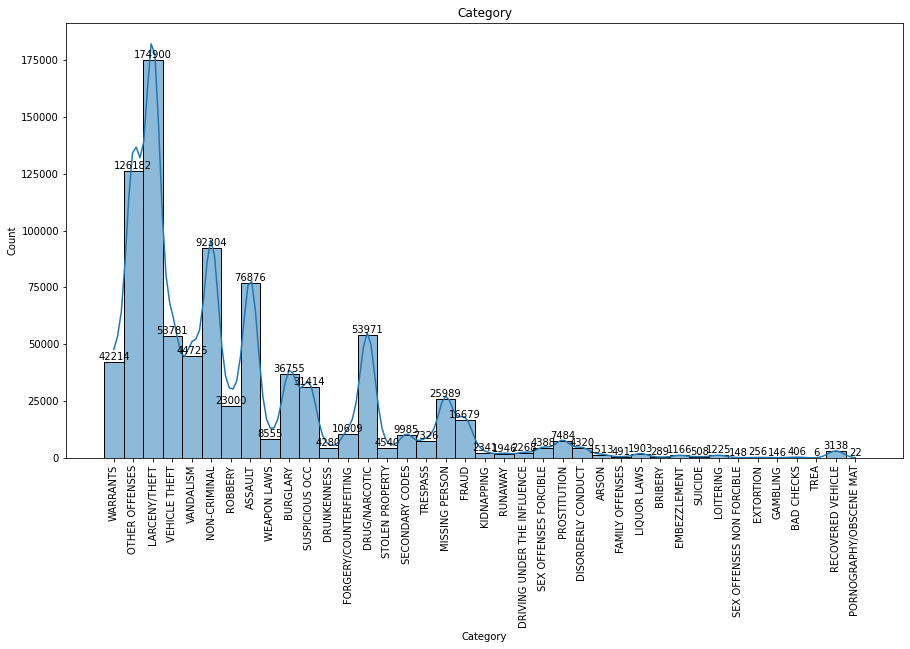

In [6]:
mp.figure(figsize = (15, 8))
plot = sb.histplot(x="Category", data = data, kde =True, palette = 'rocket')
_ = mp.xticks(rotation = 90)
plot.set_title("Category")

for i in plot.containers:
    plot.bar_label(i,)

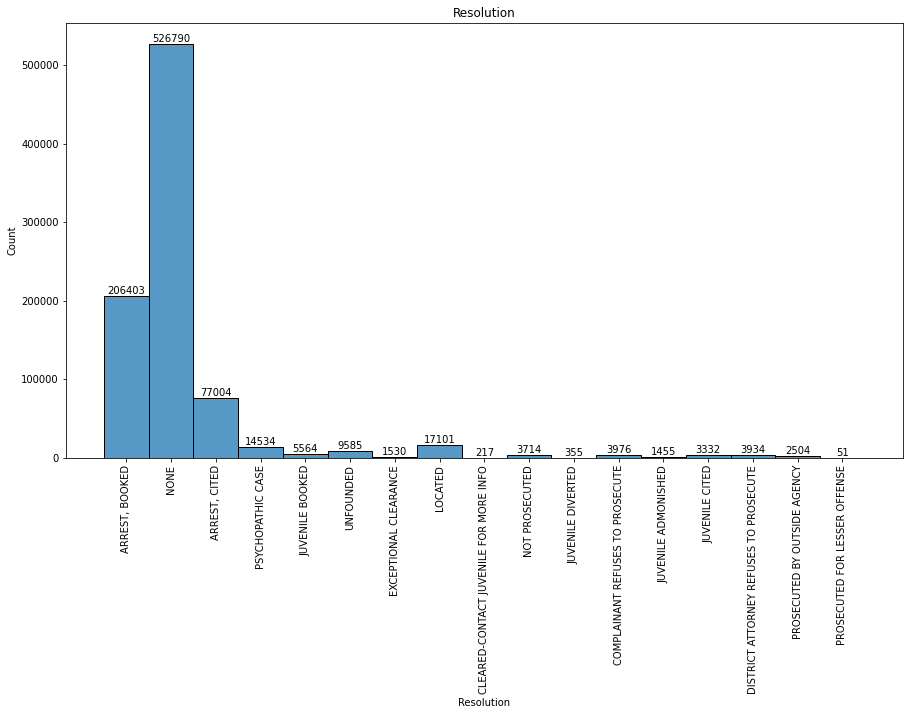

In [5]:
# res_count = data["Resolution"].value_counts()

mp.figure(figsize = (15, 8))
plot = sb.histplot(x="Resolution", data = data, kde = False, palette = 'rocket')
_ = mp.xticks(rotation = 90)
plot.set_title("Resolution")

for i in plot.containers:
    plot.bar_label(i,)

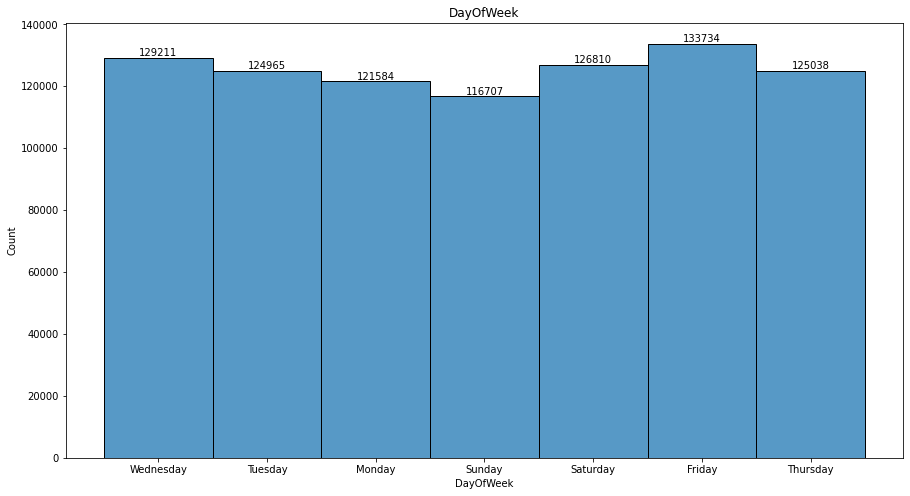

In [4]:
mp.figure(figsize = (15, 8))
plot = sb.histplot(x="DayOfWeek", data = data, kde = False, palette = 'rocket')
# _ = mp.xticks(rotation = 90)
plot.set_title("DayOfWeek")

for i in plot.containers:
    plot.bar_label(i,)

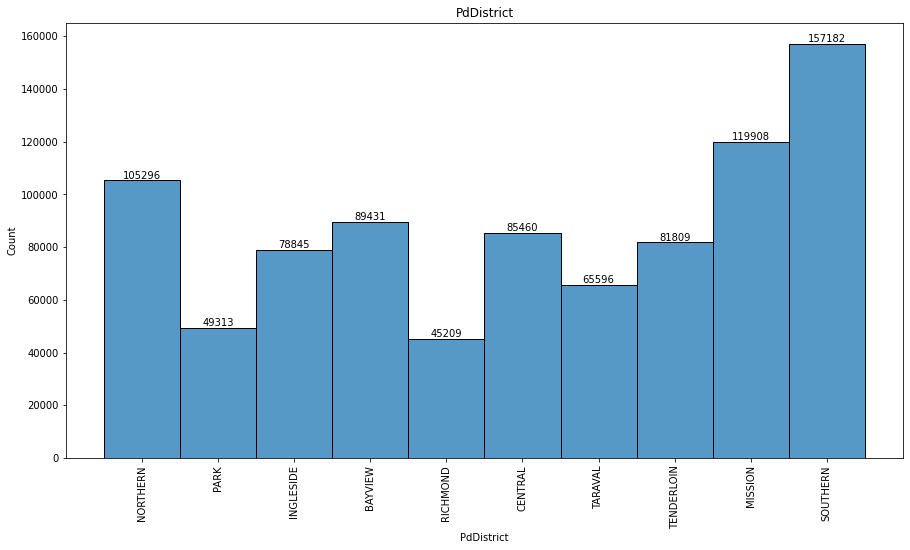

In [3]:
# res_count = data["Resolution"].value_counts()

mp.figure(figsize = (15, 8))
plot = sb.histplot(x="PdDistrict", data = data, kde = False, palette = 'rocket')
_ = mp.xticks(rotation = 90)
plot.set_title("PdDistrict")

for i in plot.containers:
    plot.bar_label(i,)

In [21]:
data.shape

(878049, 9)

In [3]:
coord_filter = ~(data["X"] > -121)
day_filter = data["DayOfWeek"] == "Wednesday"

In [4]:
data[~coord_filter]

Dates               Category  \
660485  2005-12-30 17:00:00          LARCENY/THEFT   
660711  2005-12-30 00:34:00                ASSAULT   
660712  2005-12-30 00:34:00                ASSAULT   
661106  2005-12-29 00:07:00           NON-CRIMINAL   
666430  2005-11-30 11:25:00         OTHER OFFENSES   
...                     ...                    ...   
844995  2003-06-11 08:49:00         OTHER OFFENSES   
845842  2003-06-09 09:25:00         OTHER OFFENSES   
852880  2003-05-02 01:00:00  SEX OFFENSES FORCIBLE   
857248  2003-04-14 16:30:00                ROBBERY   
871198  2003-02-05 12:00:00          LARCENY/THEFT   

                                     Descript  DayOfWeek  PdDistrict  \
660485           GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711            INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712   AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106           AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                      TRAFFIC VIOLATION  Wednesday  TENDERLOIN   
...                                       ...        ...         ...   
844995  DRIVERS LICENSE, SUSPENDED OR REVOKED  Wednesday   INGLESIDE   
845842  DRIVERS LICENSE, SUSPENDED OR REVOKED     Monday   INGLESIDE   
852880            FORCIBLE RAPE, BODILY FORCE     Friday    SOUTHERN   
857248       ROBBERY ON THE STREET, STRONGARM     Monday     BAYVIEW   
871198           PETTY THEFT FROM LOCKED AUTO  Wednesday    SOUTHERN   

                              Resolution  \
660485                              NONE   
660711                    ARREST, BOOKED   
660712                    ARREST, BOOKED   
661106                 PSYCHOPATHIC CASE   
666430                     ARREST, CITED   
...                                  ...   
844995                     ARREST, CITED   
845842                     ARREST, CITED   
852880  COMPLAINANT REFUSES TO PROSECUTE   
857248  COMPLAINANT REFUSES TO PROSECUTE   
871198                              NONE   

                                        Address      X     Y  
660485              5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712          JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106                  5THSTNORTH ST / EDDY ST -120.5  90.0  
666430                 5THSTNORTH ST / ELLIS ST -120.5  90.0  
...                                         ...    ...   ...  
844995  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
845842  JAMES LICK FREEWAY HY / CESAR CHAVEZ ST -120.5  90.0  
852880           3RD ST / JAMES LICK FREEWAY HY -120.5  90.0  
857248                     GILMAN AV / FITCH ST -120.5  90.0  
871198      SPEAR ST / THE EMBARCADERO SOUTH ST -120.5  90.0  

[67 rows x 9 columns]

In [17]:
def scatter(filter, title, hue, size):
    mp.figure(figsize = (19, 19))
    sb.scatterplot(data = data[filter], x = 'X', y = 'Y', alpha = 0.6, palette = 'tab10', hue = hue, size = size)
    mp.xticks(np.arange(-123, -122))
    mp.yticks(np.arange(37, 38))
    mp.title(title)
    mp.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')

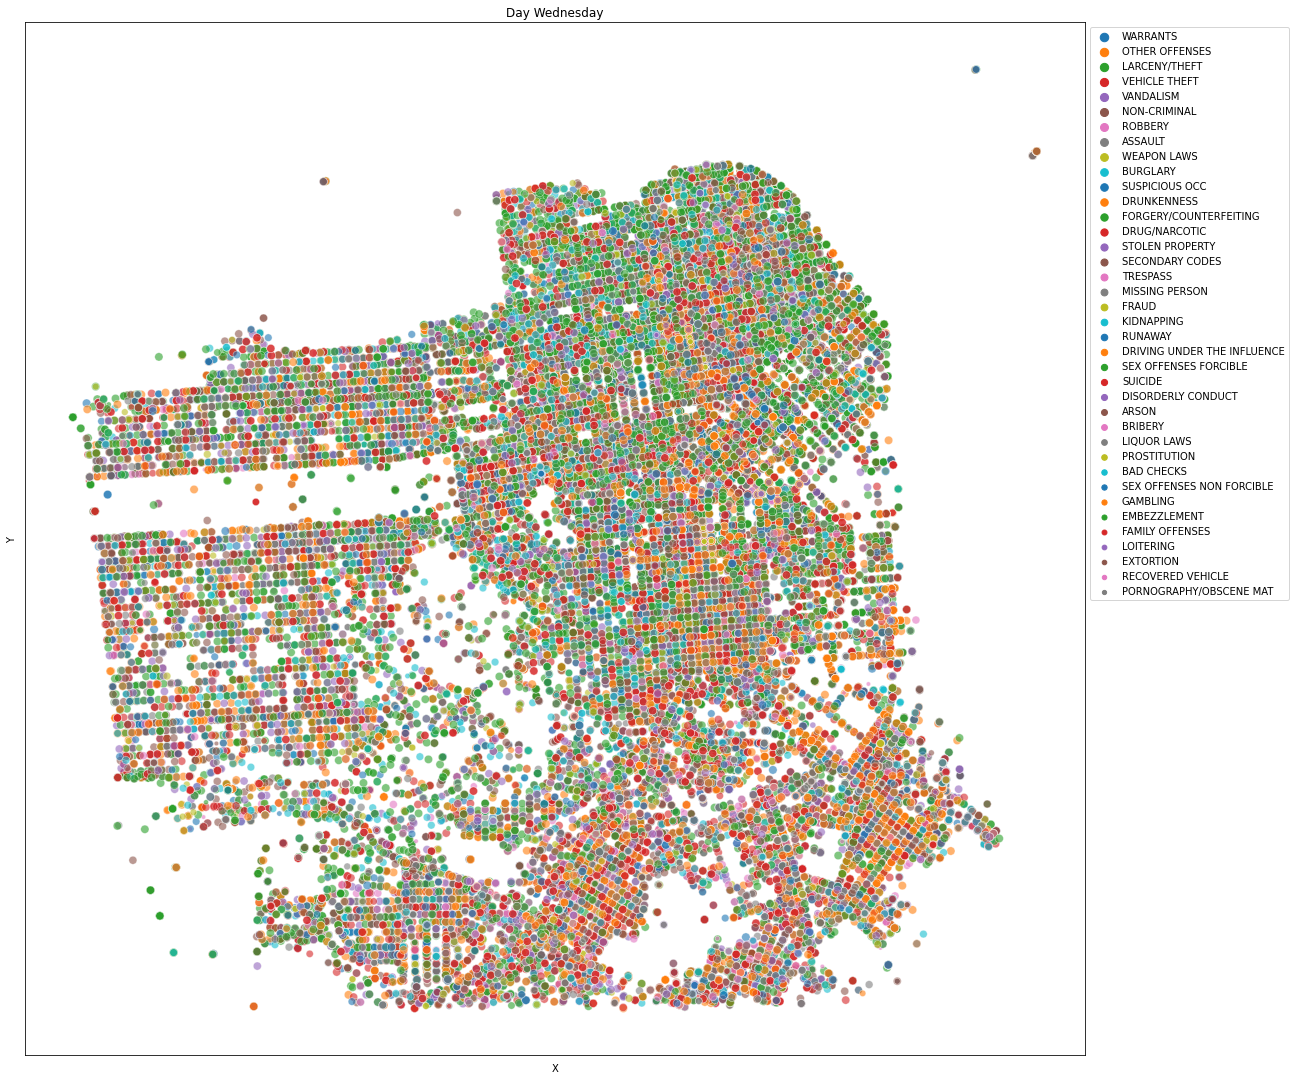

In [14]:
coord_filter = ~(data["X"] > -121)
day_filter = data["DayOfWeek"] == "Wednesday"

scatter(day_filter & coord_filter, "Day Wednesday", "Category", "Category")

Looks somewhat like the map of San Fransisco.

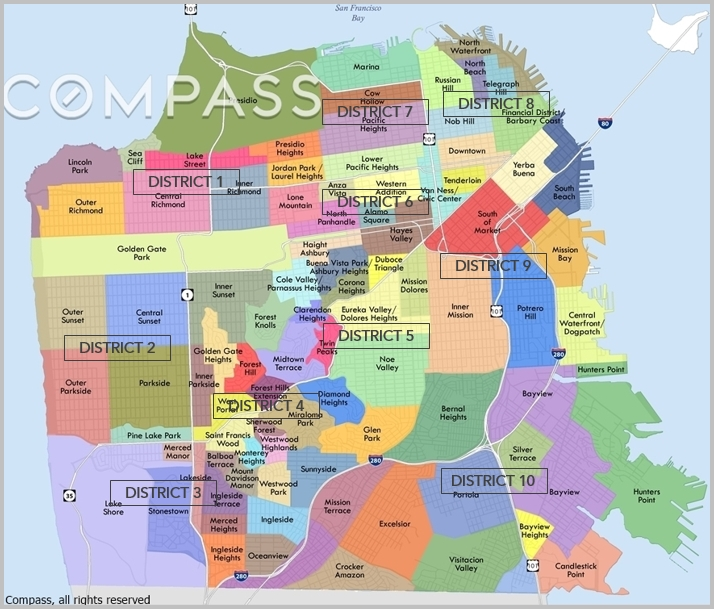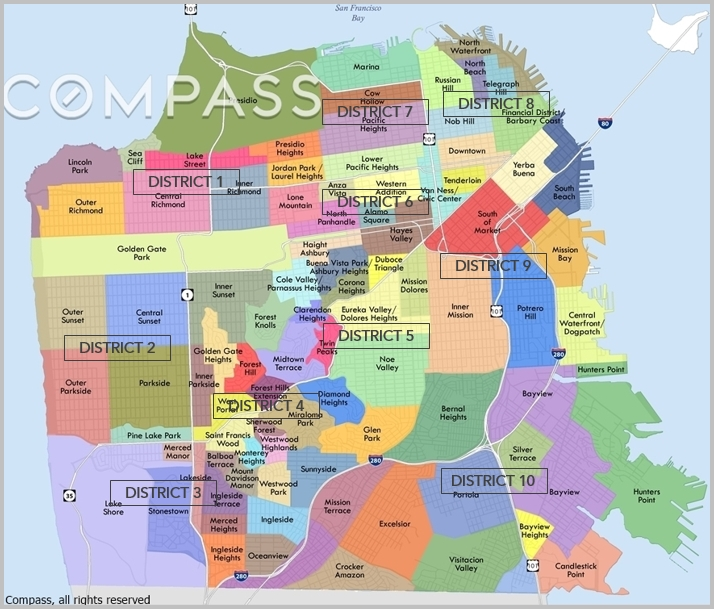

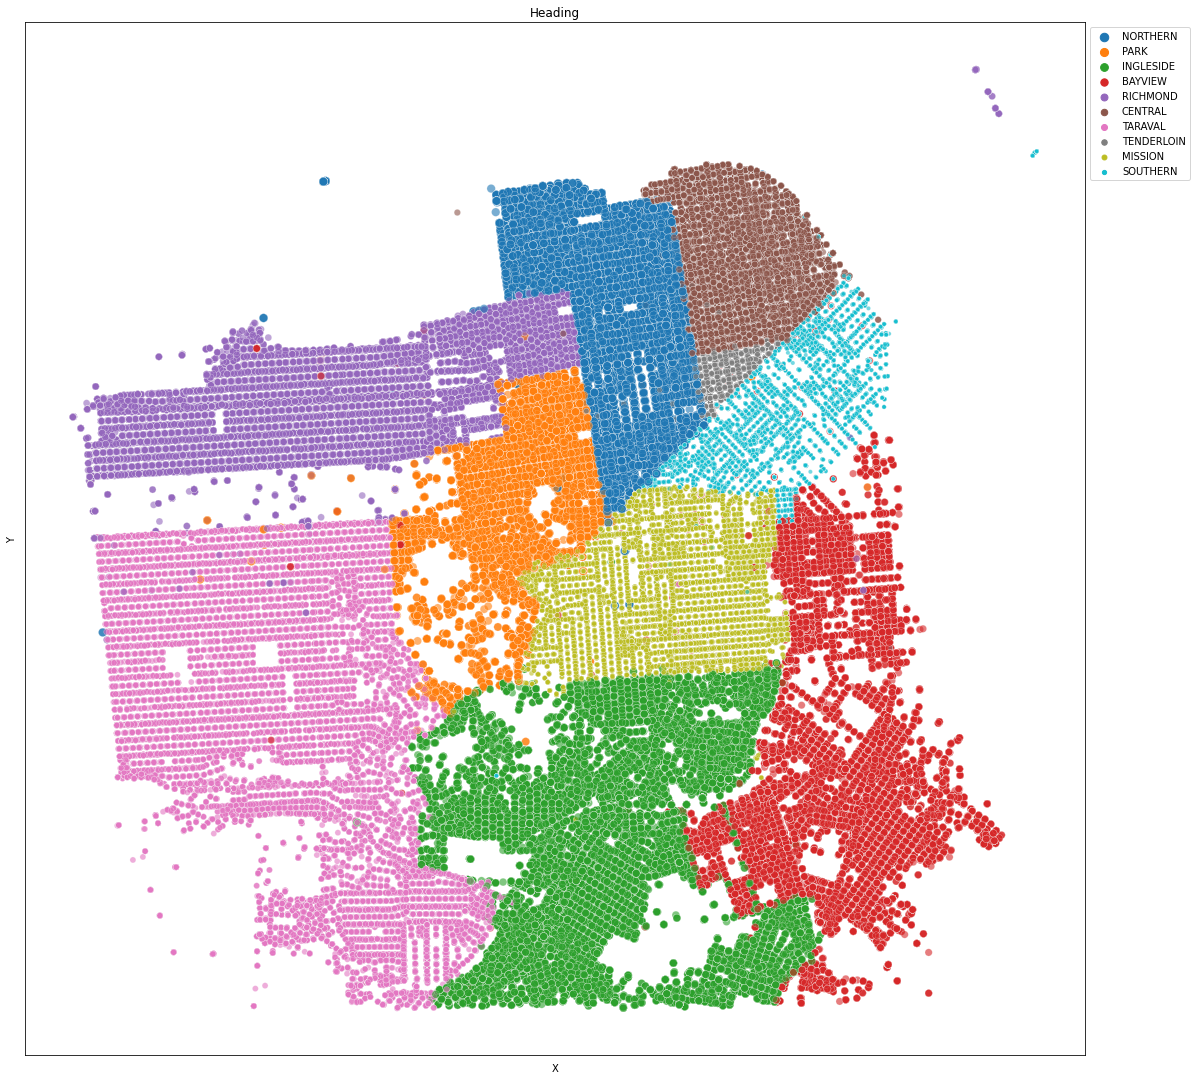

In [19]:
coord_filter = ~(data["X"] > -121)
cat_filter = data["Category"] == "LARCENY/THEFT"

scatter(coord_filter, "Heading", "PdDistrict", "PdDistrict")

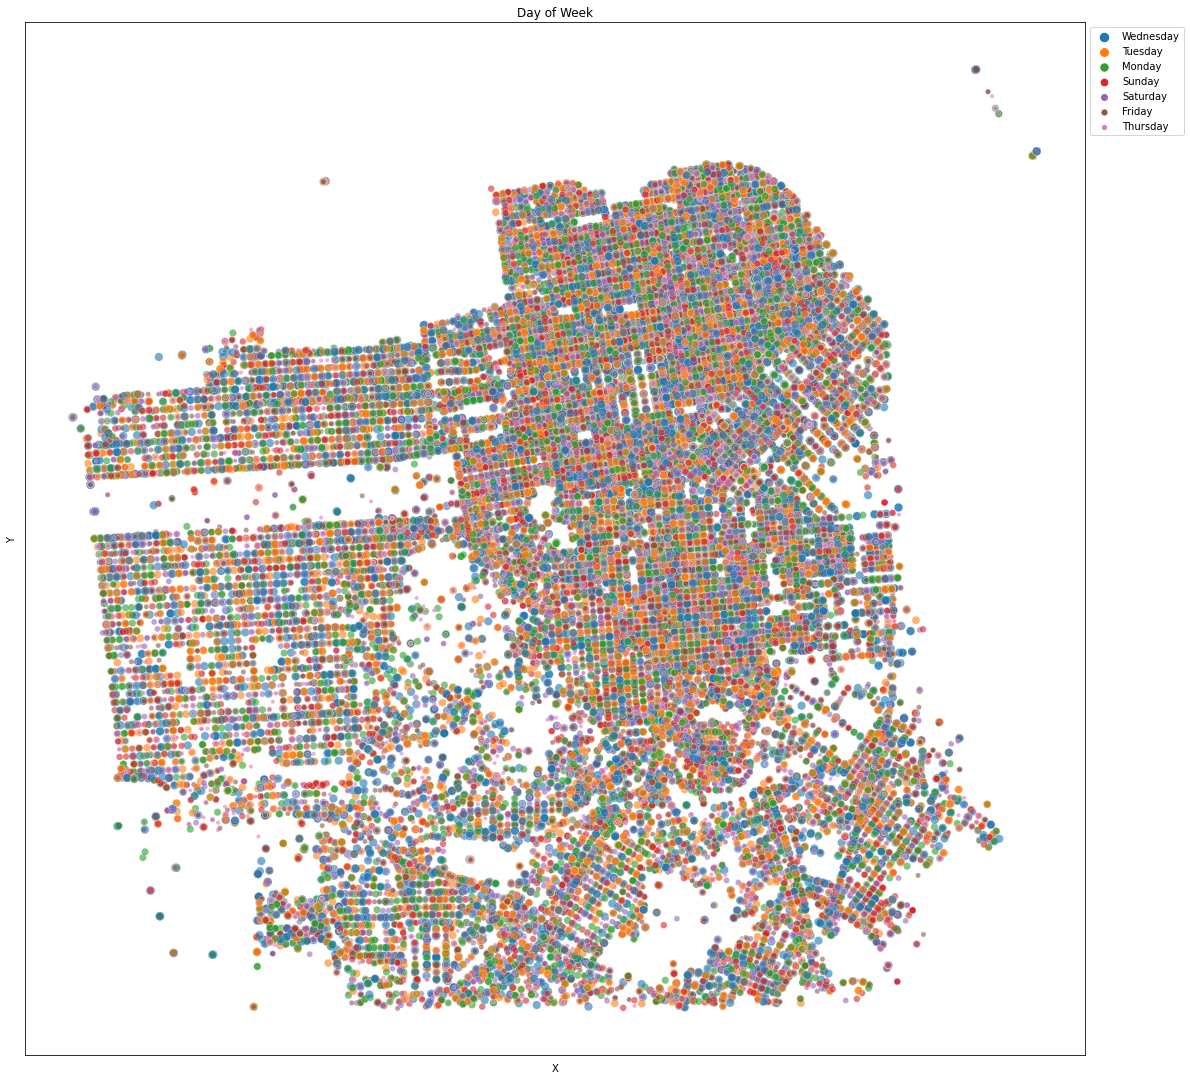

In [22]:
cat_filter = data["Category"] == "LARCENY/THEFT"

scatter(cat_filter & coord_filter, "Day of Week", "DayOfWeek", "DayOfWeek")

In [33]:
def query_heat_map(query = "", location = [37.774599, -122.425892]):
    if query != "":
        train_query = data.query(query).loc[:, ['Y', 'X']]
    else:
        train_query = data.loc[:, ['Y', 'X']]
    
    if train_query.shape[0] == 0:
        print('Either the query is failing or there is no data filtered by the query.')
    
    m = folium.Map(location=location, zoom_start=13, tiles='CartoDB dark_matter') # HeatmapPlot-tiles : cartodbdark_matter
    train_query_geo_list = train_query.values.tolist()
    
    for p in train_query_geo_list:
        folium.CircleMarker(p, blur=0, radius=1).add_to(m)
    #m.save('SanFrancisco-Crime-geo.html') # add 
    return m

In [ ]:
# query_heat_map("Category=='ASSAULT' & Resolution=='ARREST, BOOKED'")
query_heat_map()

In [3]:

# query_heat_map("Category=='ASSAULT' & Resolution=='NONE'")

Assault cases without any resolution seem to be a lot more than the ones in which the criminal was punished.

In [17]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [24]:
# data.set_index(dates)

In [23]:
# temp_data.loc["2015"]

In [13]:
dates = pd.to_datetime(data["Dates"], format = "%Y-%m-%d %H:%M:%S")
# temp_data["Dates"] = dates
temp_data = data.set_index(dates)
# temp_data["Dates"] = dates
temp_data.head()

Dates        Category  \
Dates                                                      
2015-05-13 23:53:00  2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00  2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00  2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y  
Dates                           
2015-05-13 23:53:00  37.774599  
2015-05-13 23:53:00  37.774599  
2015-05-13 23:33:00  37.800414  
2015-05-13 23:30:00  37.800873  
2015-05-13 23:30:00  37.771541

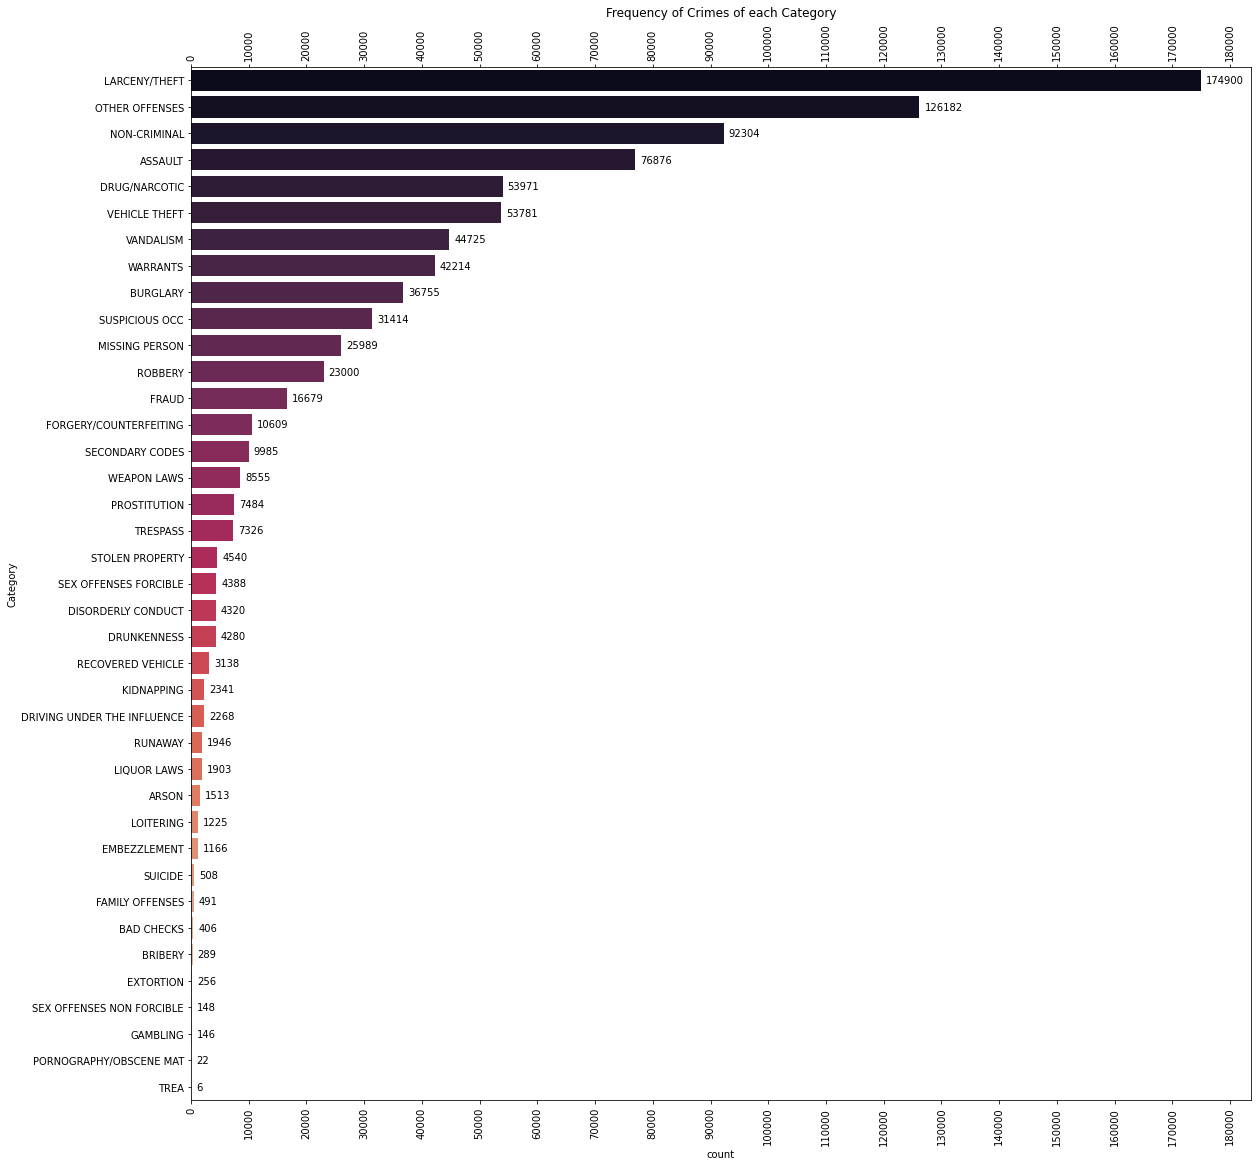

In [16]:
_ = mp.figure(figsize=(19, 19))
plot = sb.countplot(y='Category', data = temp_data, order = temp_data['Category'].value_counts().index, palette = 'rocket')
ax = mp.gca()
_ = ax.tick_params(axis = "x", rotation=90, bottom=True, top=True, labelbottom=True, labeltop=True)
_ = ax.set_xticks(np.arange(0, 185000, 10000))
ax.set_title("Frequency of Crimes of each Category")
# ax.margins(x=0.1)
for i in plot.containers:
    plot.bar_label(i, padding = 5)

There doesn't seem to be any outliers in the dates.

Print the dates and the months for the new dataset

In [28]:
district_group

PdDistrict  Category                 
BAYVIEW     OTHER OFFENSES               17053
            LARCENY/THEFT                10119
            ASSAULT                       9857
            VEHICLE THEFT                 7219
            NON-CRIMINAL                  6099
                                         ...  
TENDERLOIN  GAMBLING                        12
            RUNAWAY                          9
            EXTORTION                        8
            SEX OFFENSES NON FORCIBLE        5
            PORNOGRAPHY/OBSCENE MAT          1
Name: Category, Length: 382, dtype: int64

[Calculating the frequency of categories from group by bypassing the "indexing the same column used in group by" error](https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column)

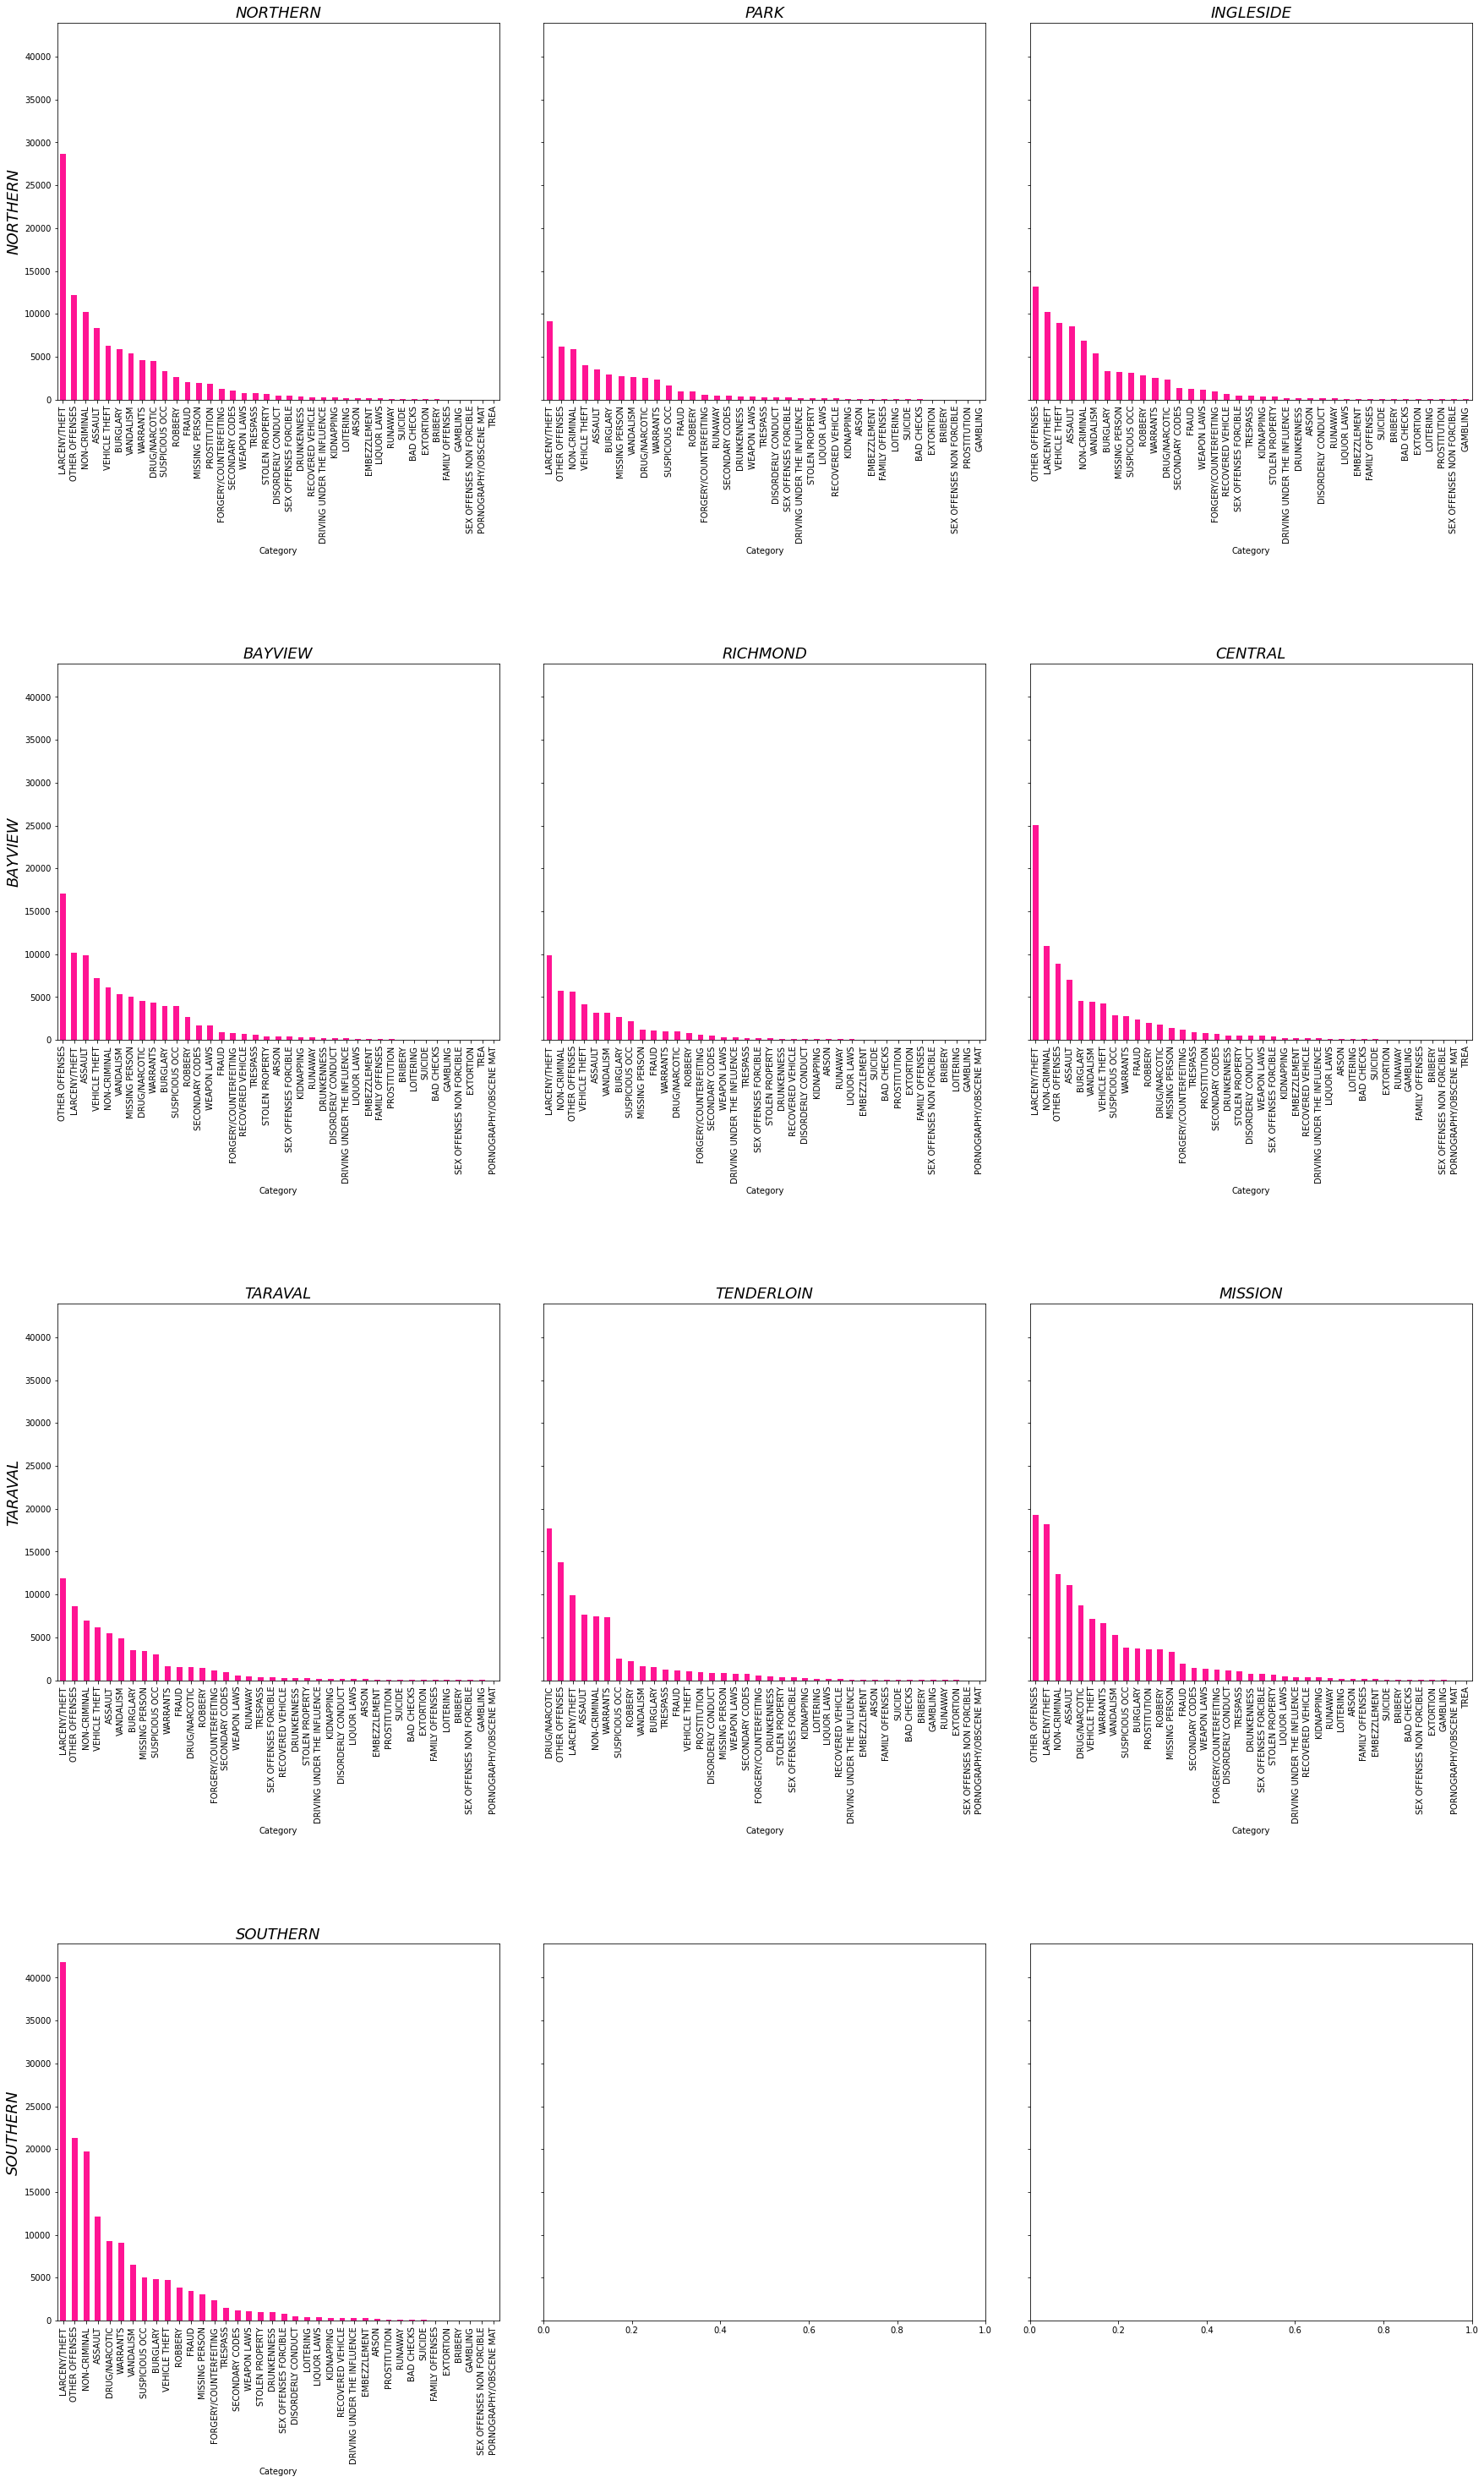

In [25]:
district_group = temp_data.groupby(["PdDistrict"])["Category"].value_counts()

##### IMPLEMENT THIS ######
# df['freq'] = df.groupby('a')['a'].transform('count')

font = {'size' : 12.5}
mp.rc('font', **font)

nrows, ncols = 4, 3
districts = temp_data['PdDistrict'].unique()
dist_ctr, cat_ctr = 0, 0

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(30, 50), sharey=True)
mp.subplots_adjust(wspace=0.1, hspace=0.7)

for i in range(nrows):
    for j in range(ncols):
        if dist_ctr < len(districts):
            ax = axes[i][j]
            district_group[districts[dist_ctr]].plot(kind='bar', color='deeppink', ax= ax)
            ax.set_title(districts[dist_ctr], fontstyle='italic', fontsize=18)
            ax.set_ylabel(districts[dist_ctr], fontstyle='italic', fontsize=18)
            dist_ctr += 1
            cat_ctr += 1


In [12]:
temp = pd.DataFrame(temp_data['Category'].value_counts(normalize=True))
temp['Cum_Sum'] = frequency_c['Category'].cumsum()
temp_highest_crime = list(temp[temp['Cum_Sum'] < 0.8].index)
temp_highest_crime

['LARCENY/THEFT',
 'OTHER OFFENSES',
 'NON-CRIMINAL',
 'ASSAULT',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'VANDALISM',
 'WARRANTS',
 'BURGLARY']

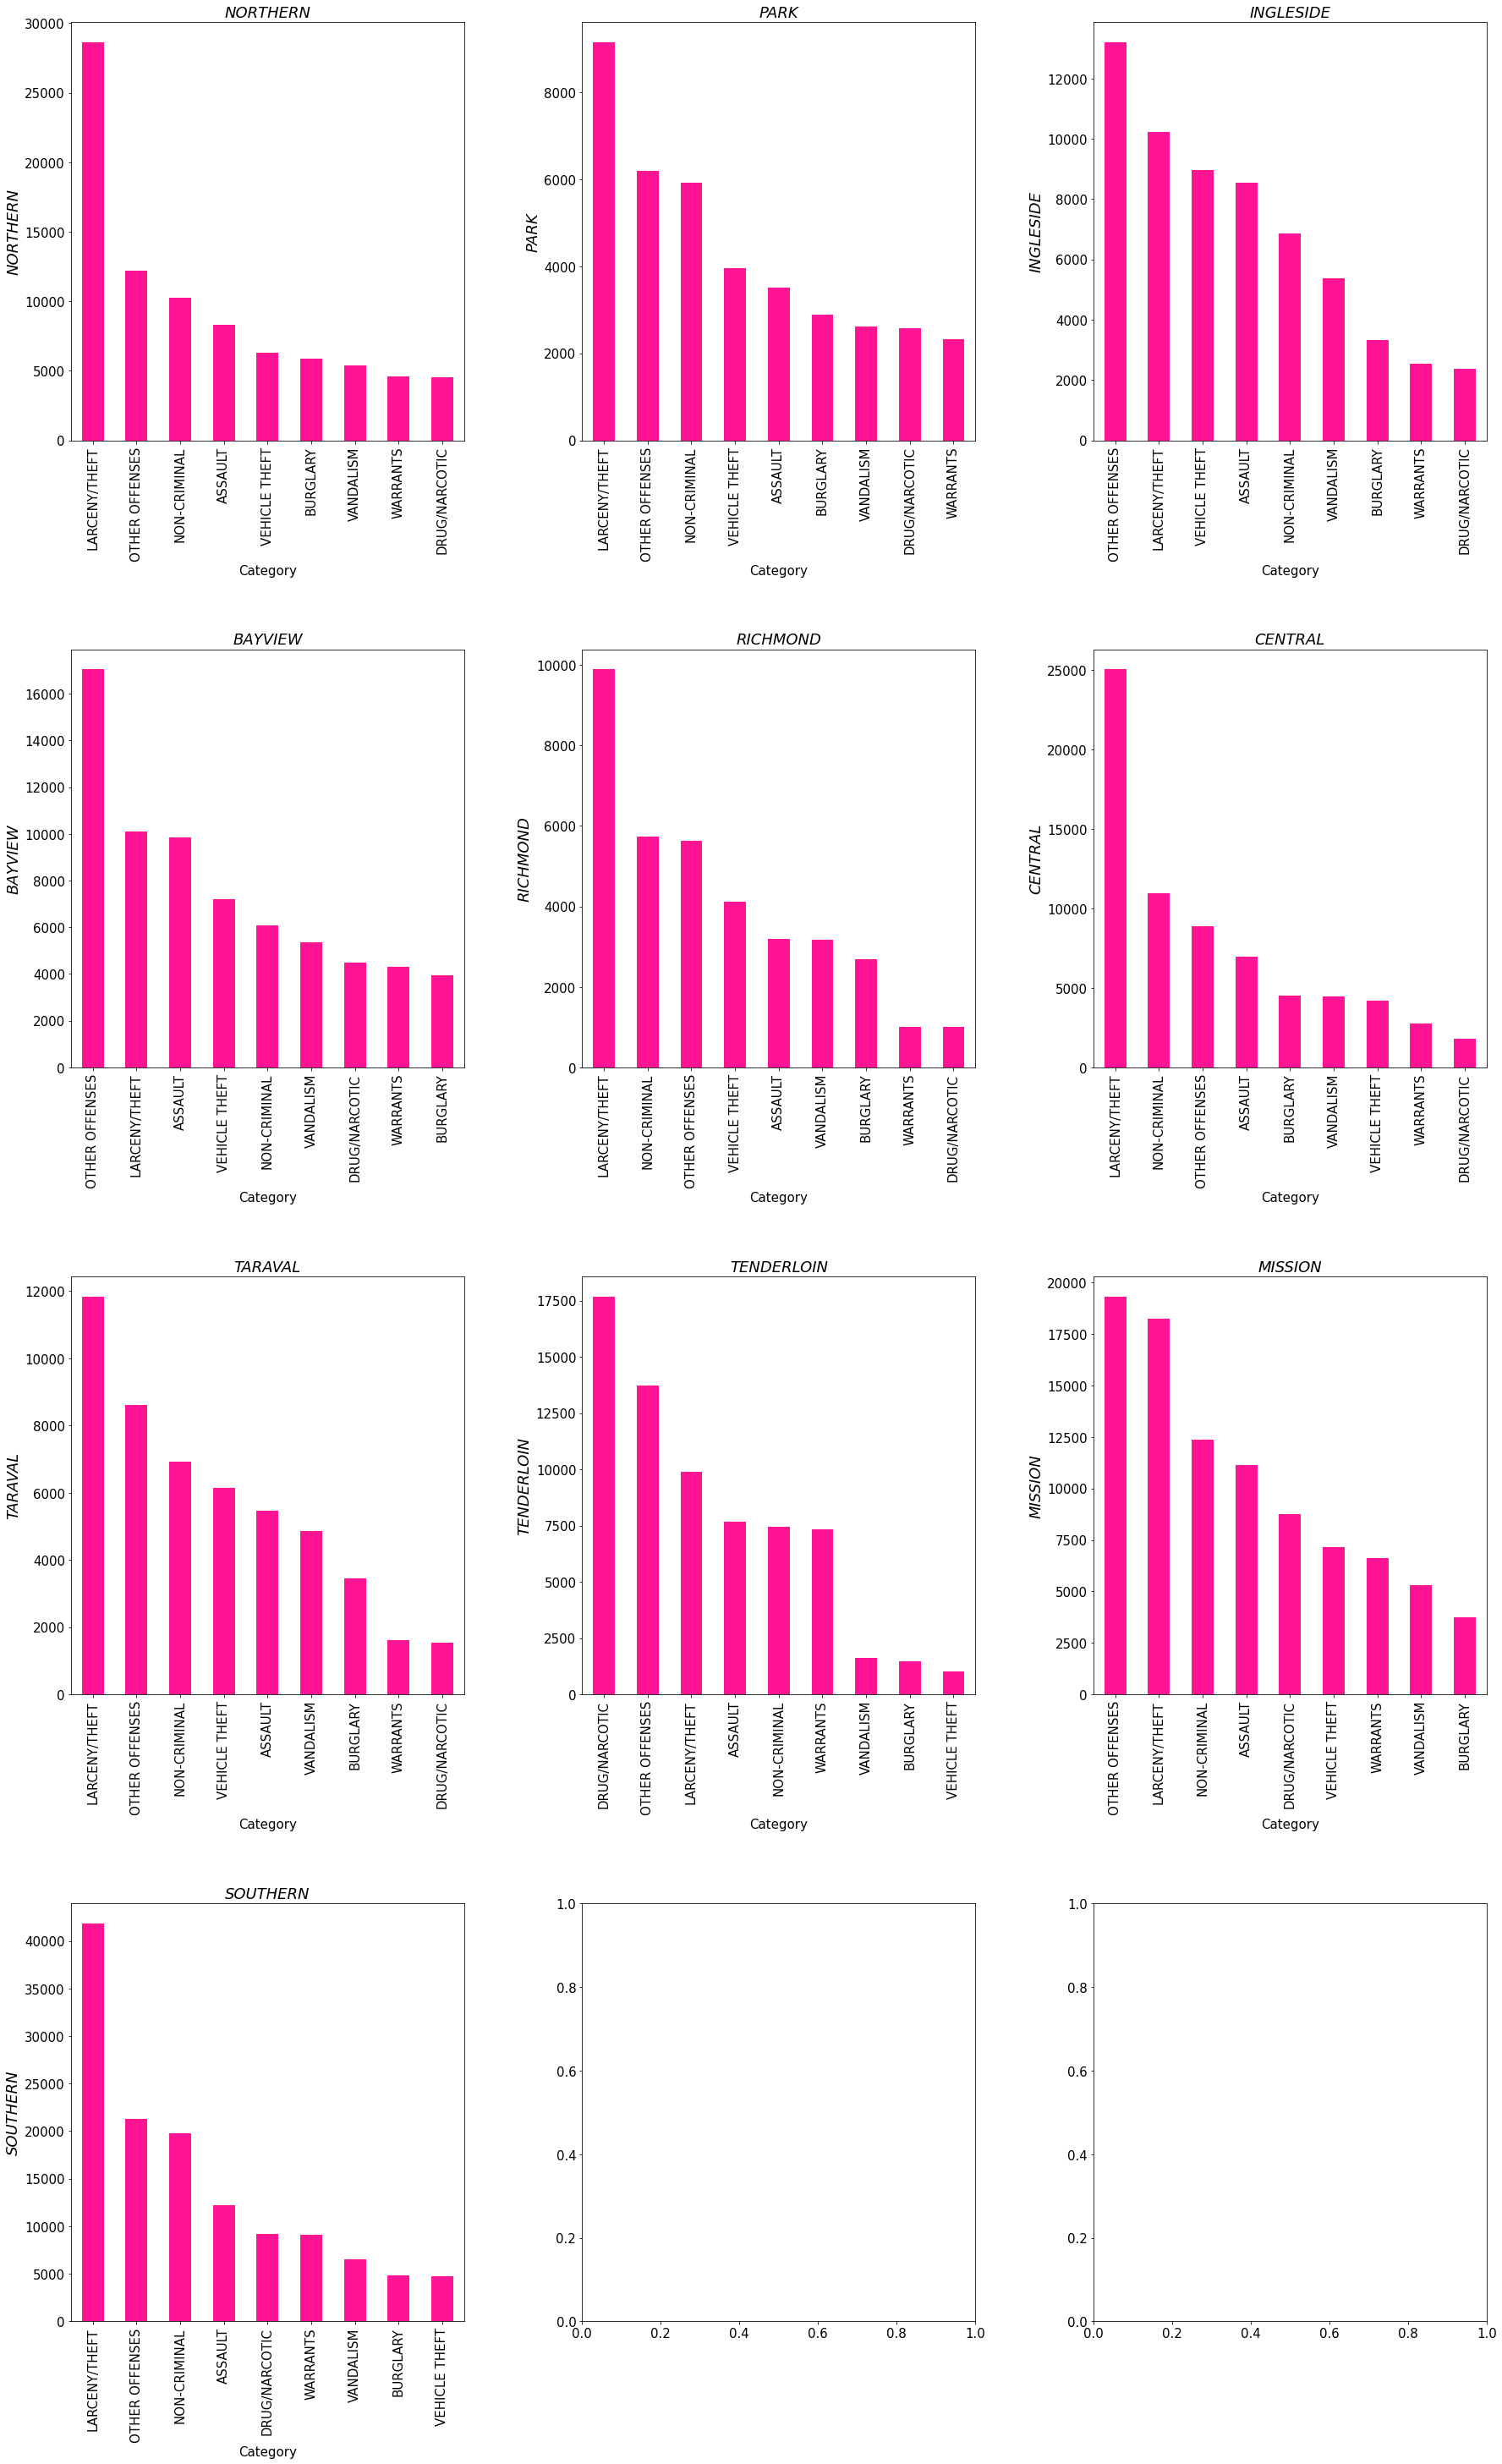

In [17]:
filtered_temp = temp_data[temp_data["Category"].isin(temp_highest_crime)]

district_group = filtered_temp.groupby(["PdDistrict"])["Category"].value_counts()

##### IMPLEMENT THIS ######
# df['freq'] = df.groupby('a')['a'].transform('count')

font = {'size' : 15}
mp.rc('font', **font)

nrows, ncols = 4, 3
districts = temp_data['PdDistrict'].unique()
dist_ctr, cat_ctr = 0, 0

fig, axes = mp.subplots(nrows=nrows, ncols=ncols, figsize=(30, 50), sharey=False)
mp.subplots_adjust(wspace=0.3, hspace=0.5)

for i in range(nrows):
    for j in range(ncols):
        if dist_ctr < len(districts):
            ax = axes[i][j]
            district_group[districts[dist_ctr]].plot(kind='bar', color='deeppink', ax= ax)
            ax.set_title(districts[dist_ctr], fontstyle='italic', fontsize=18)
            ax.set_ylabel(districts[dist_ctr], fontstyle='italic', fontsize=18)
            dist_ctr += 1
            cat_ctr += 1


[Matplotlib Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

* date columns and encoding
* 

In [18]:
temp_data.head()

Dates        Category  \
Dates                                                      
2015-05-13 23:53:00  2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00  2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00  2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y  
Dates                           
2015-05-13 23:53:00  37.774599  
2015-05-13 23:53:00  37.774599  
2015-05-13 23:33:00  37.800414  
2015-05-13 23:30:00  37.800873  
2015-05-13 23:30:00  37.771541

In [21]:
of_filter = temp_data["Address"].str.contains("of")
slash_filter = temp_data["Address"].str.contains("/")

temp_data[~of_filter & ~slash_filter]

Empty DataFrame
Columns: [Dates, Category, Descript, DayOfWeek, PdDistrict, Resolution, Address, X, Y]
Index: []

There is no address which does not include the charachters **"of"** & **"/"**.

We can use them to split and parse the addressed to get the **area / block** and the **street** information.

In [4]:
def address_parsing(row):
    if "/" in row:
        char = "/"
    else:
        char = "of"
    
    block_street = row.split(char)
    block = block_street[0].strip()
    street = block_street[1].strip()

    return pd.Series([block, street])

In [5]:
# Address Informtion Extraction

addr_res = temp_data["Address"].apply(address_parsing)
temp_data = pd.concat([temp_data, addr_res], axis=1)
temp_data.rename(columns={0: 'Block', 1: 'Street'}, inplace=True, errors='raise')
temp_data.head()

# Takes 5 minutes to run

Dates        Category  \
Dates                                                      
2015-05-13 23:53:00  2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00  2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00  2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00  2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y       Block        Street  
Dates                                                     
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST  
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST  
2015-05-13 23:33:00  37.800414  VANNESS AV  GREENWICH ST  
2015-05-13 23:30:00  37.800873  1500 Block    LOMBARD ST  
2015-05-13 23:30:00  37.771541   100 Block  BRODERICK ST

In [6]:
# Date Time Information Extraction

temp_data['Dates'] = pd.to_datetime(temp_data['Dates'])
temp_data['Date'] = pd.to_datetime(temp_data['Dates'].dt.date)
temp_data['Year'] = temp_data['Dates'].dt.year
temp_data['Month'] = temp_data['Dates'].dt.month
temp_data['Day'] = temp_data['Dates'].dt.day
temp_data['Hour'] = temp_data['Dates'].dt.hour
temp_data['Minute'] = temp_data['Dates'].dt.minute
temp_data['Second'] = temp_data['Dates'].dt.second

# Holidays Information Extraction

us_holidays = holidays.US()
temp_data['Holiday'] = temp_data['Dates'].dt.date.isin(us_holidays)

# Weekday Encoding

weekday_replacement = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6,}
temp_data['Week_Mapping'] = temp_data['DayOfWeek'].map(weekday_replacement)


temp_data.head()

Dates        Category  \
Dates                                                     
2015-05-13 23:53:00 2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00 2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00 2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y       Block        Street       Date  Year  \
Dates                                                                       
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:33:00  37.800414  VANNESS AV  GREENWICH ST 2015-05-13  2015   
2015-05-13 23:30:00  37.800873  1500 Block    LOMBARD ST 2015-05-13  2015   
2015-05-13 23:30:00  37.771541   100 Block  BRODERICK ST 2015-05-13  2015   

                     Month  Day  Hour  Minute  Second  Holiday  
Dates                                                           
2015-05-13 23:53:00      5   13    23      53       0    False  
2015-05-13 23:53:00      5   13    23      53       0    False  
2015-05-13 23:33:00      5   13    23      33       0    False  
2015-05-13 23:30:00      5   13    23      30       0    False  
2015-05-13 23:30:00      5   13    23      30       0    False

In [28]:
"""

Morning Time and Night Time
6 - 18
18 - 6

Work Hours Only for Weekdays - Assuming Saturday and Sunday arent working days.
8 - 18

Weekdays and Weekends
0, 6 --> Weekend
1-5 --> Weekday


Seasons
Winter is December, through February; --> 12 - 2
Spring is March through May; --> 3 - 5
Summer is June through August; --> 6 - 8
Fall is September through November. --> 9 - 11


"""
def morning_or_night(row):
    # print("Row", row)
    if 6 <= row < 18:
        return "Morning"
    else:
        return "Night"

def work_hours(dow, hr):
    if dow in (0, 6):
        return False
    elif 8 <= hr < 18:
        return True
    else:
        return False

def weekday_or_weekend(row):
    if row in (0, 6):
        return True
    else:
        return False


def season(row):
    if row in (12, 1, 2):
        return "Winter"
    elif row in (3, 4, 5):
        return "Spring"
    elif row in (6, 7, 8):
        return "Summer"
    elif row in (9, 10, 11):
        return "Fall"

temp_data['DayTime'] = temp_data["Hour"].apply(morning_or_night)
temp_data['WorkHour'] = temp_data.apply(lambda x: work_hours(x["DayOfWeek"], x["Hour"]), axis=1)
temp_data['WeekTime'] = temp_data["DayOfWeek"].apply(weekday_or_weekend)
temp_data['Season'] = temp_data["Month"].apply(season)

temp_data.head()

Dates        Category  \
Dates                                                     
2015-05-13 23:53:00 2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00 2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00 2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y       Block        Street       Date  Year  \
Dates                                                                       
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:33:00  37.800414  VANNESS AV  GREENWICH ST 2015-05-13  2015   
2015-05-13 23:30:00  37.800873  1500 Block    LOMBARD ST 2015-05-13  2015   
2015-05-13 23:30:00  37.771541   100 Block  BRODERICK ST 2015-05-13  2015   

                     Month  Day  Hour  Minute  Second  Holiday  Week_Mapping  \
Dates                                                                          
2015-05-13 23:53:00      5   13    23      53       0    False             3   
2015-05-13 23:53:00      5   13    23      53       0    False             3   
2015-05-13 23:33:00      5   13    23      33       0    False             3   
2015-05-13 23:30:00      5   13    23      30       0    False             3   
2015-05-13 23:30:00      5   13    23      30       0    False             3   

                    DayTime  WorkHour  WeekTime  Season  
Dates                                                    
2015-05-13 23:53:00   Night     False     False  Spring  
2015-05-13 23:53:00   Night     False     False  Spring  
2015-05-13 23:33:00   Night     False     False  Spring  
2015-05-13 23:30:00   Night     False     False  Spring  
2015-05-13 23:30:00   Night     False     False  Spring

In [27]:
temp_data.head()

Dates        Category  \
Dates                                                     
2015-05-13 23:53:00 2015-05-13 23:53:00        WARRANTS   
2015-05-13 23:53:00 2015-05-13 23:53:00  OTHER OFFENSES   
2015-05-13 23:33:00 2015-05-13 23:33:00  OTHER OFFENSES   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   
2015-05-13 23:30:00 2015-05-13 23:30:00   LARCENY/THEFT   

                                         Descript  DayOfWeek PdDistrict  \
Dates                                                                     
2015-05-13 23:53:00                WARRANT ARREST  Wednesday   NORTHERN   
2015-05-13 23:53:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:33:00      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
2015-05-13 23:30:00  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

                         Resolution                    Address           X  \
Dates                                                                        
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:53:00  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2015-05-13 23:33:00  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
2015-05-13 23:30:00            NONE   1500 Block of LOMBARD ST -122.426995   
2015-05-13 23:30:00            NONE  100 Block of BRODERICK ST -122.438738   

                             Y       Block        Street       Date  Year  \
Dates                                                                       
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:53:00  37.774599      OAK ST     LAGUNA ST 2015-05-13  2015   
2015-05-13 23:33:00  37.800414  VANNESS AV  GREENWICH ST 2015-05-13  2015   
2015-05-13 23:30:00  37.800873  1500 Block    LOMBARD ST 2015-05-13  2015   
2015-05-13 23:30:00  37.771541   100 Block  BRODERICK ST 2015-05-13  2015   

                     Month  Day  Hour  Minute  Second  Holiday  Week_Mapping  \
Dates                                                                          
2015-05-13 23:53:00      5   13    23      53       0    False             3   
2015-05-13 23:53:00      5   13    23      53       0    False             3   
2015-05-13 23:33:00      5   13    23      33       0    False             3   
2015-05-13 23:30:00      5   13    23      30       0    False             3   
2015-05-13 23:30:00      5   13    23      30       0    False             3   

                    DayTime  WorkHour  WeekTime  Season  
Dates                                                    
2015-05-13 23:53:00   Night     False     False  Spring  
2015-05-13 23:53:00   Night     False     False  Spring  
2015-05-13 23:33:00   Night     False     False  Spring  
2015-05-13 23:30:00   Night     False     False  Spring  
2015-05-13 23:30:00   Night     False     False  Spring

In [26]:
pd.set_option('display.max_columns', None)